# K Nearest Neighbor (KNN)

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load dữ liệu
dataset = pd.read_csv('diabetes.csv')

## 1) Khám phá dữ liệu

In [3]:
# get how many instances (rows) and how many attributes (columns)
dataset.shape

(768, 9)

In [4]:
#show thông tin thống kê cơ bản: max, min, mean của các columns trong dataset
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#để hiện thông tin thống kê tất cả column (gồm categorical columns)
dataset.describe(include = 'all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Show vài dòng đầu tiên của dữ liệu
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#Show vài dòng cuối của dữ liệu
dataset.tail(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
# T number of instances (rows) that belong to each class. 
dataset.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

###  Visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Pairplot

<Figure size 640x480 with 0 Axes>

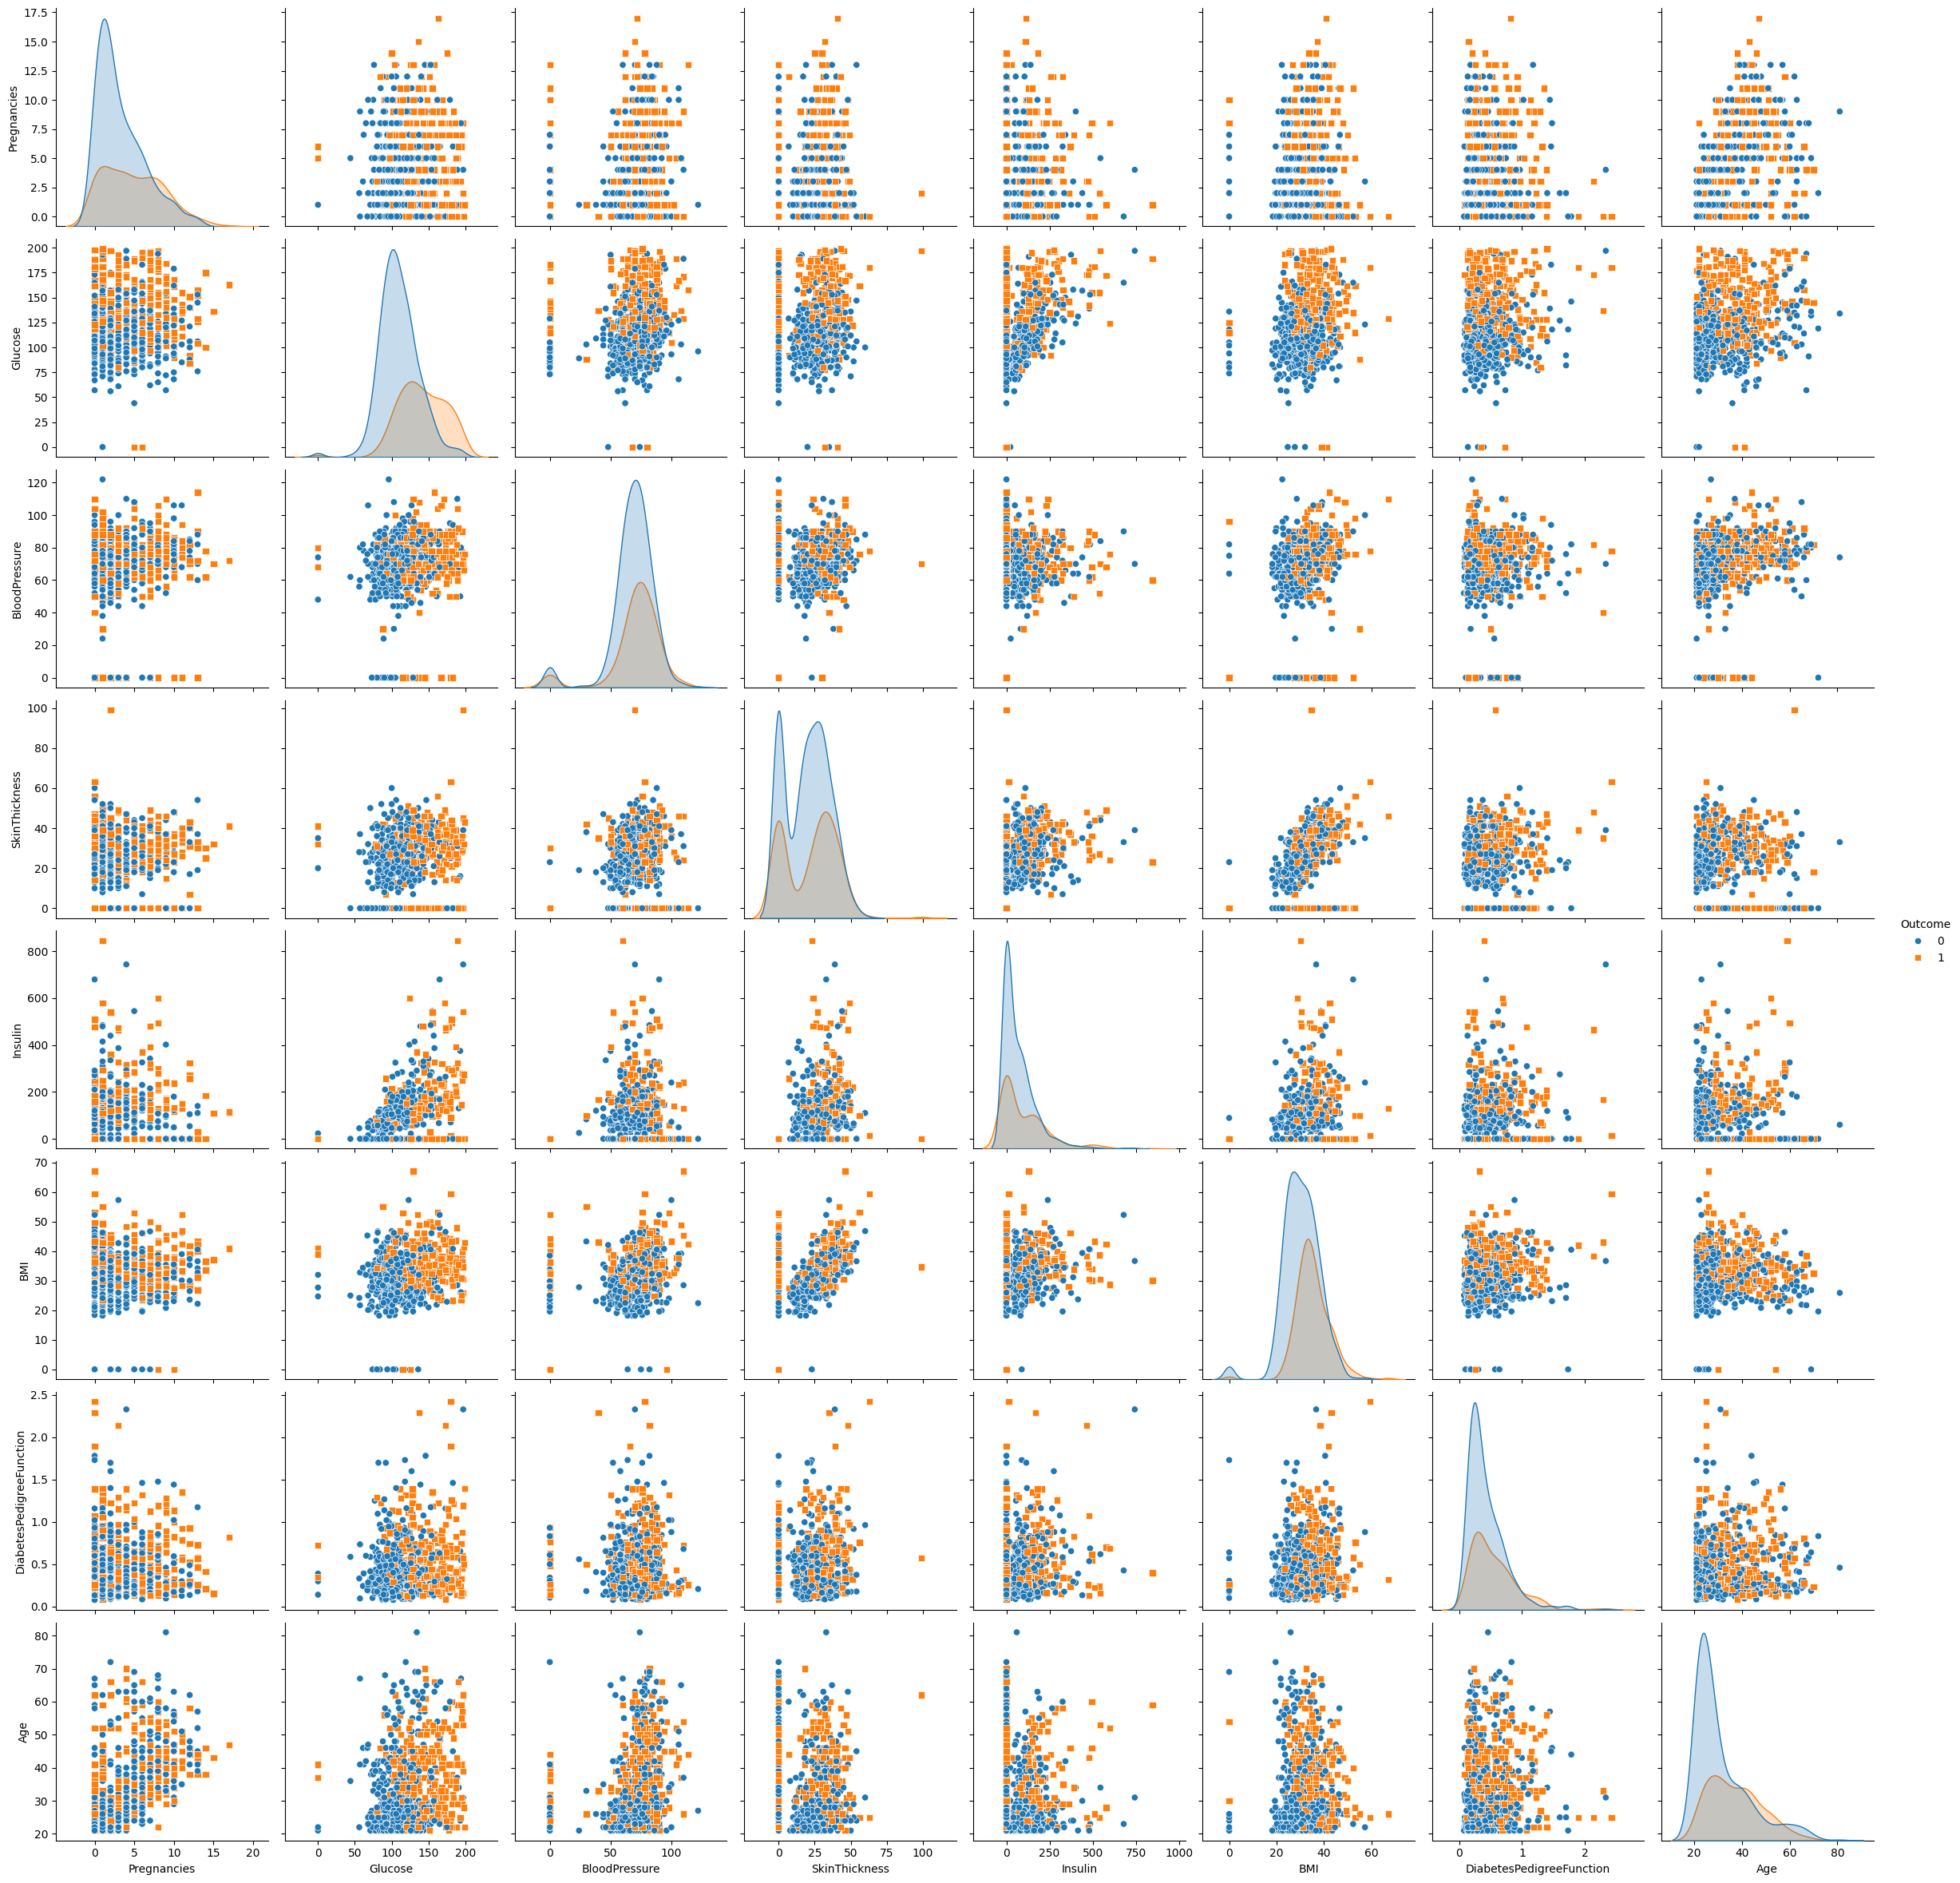

In [11]:
plt.figure()
sns.pairplot(dataset, hue = "Outcome", height=3, markers=["o", "s"])
plt.show()

####  Boxplots

<Figure size 640x480 with 0 Axes>

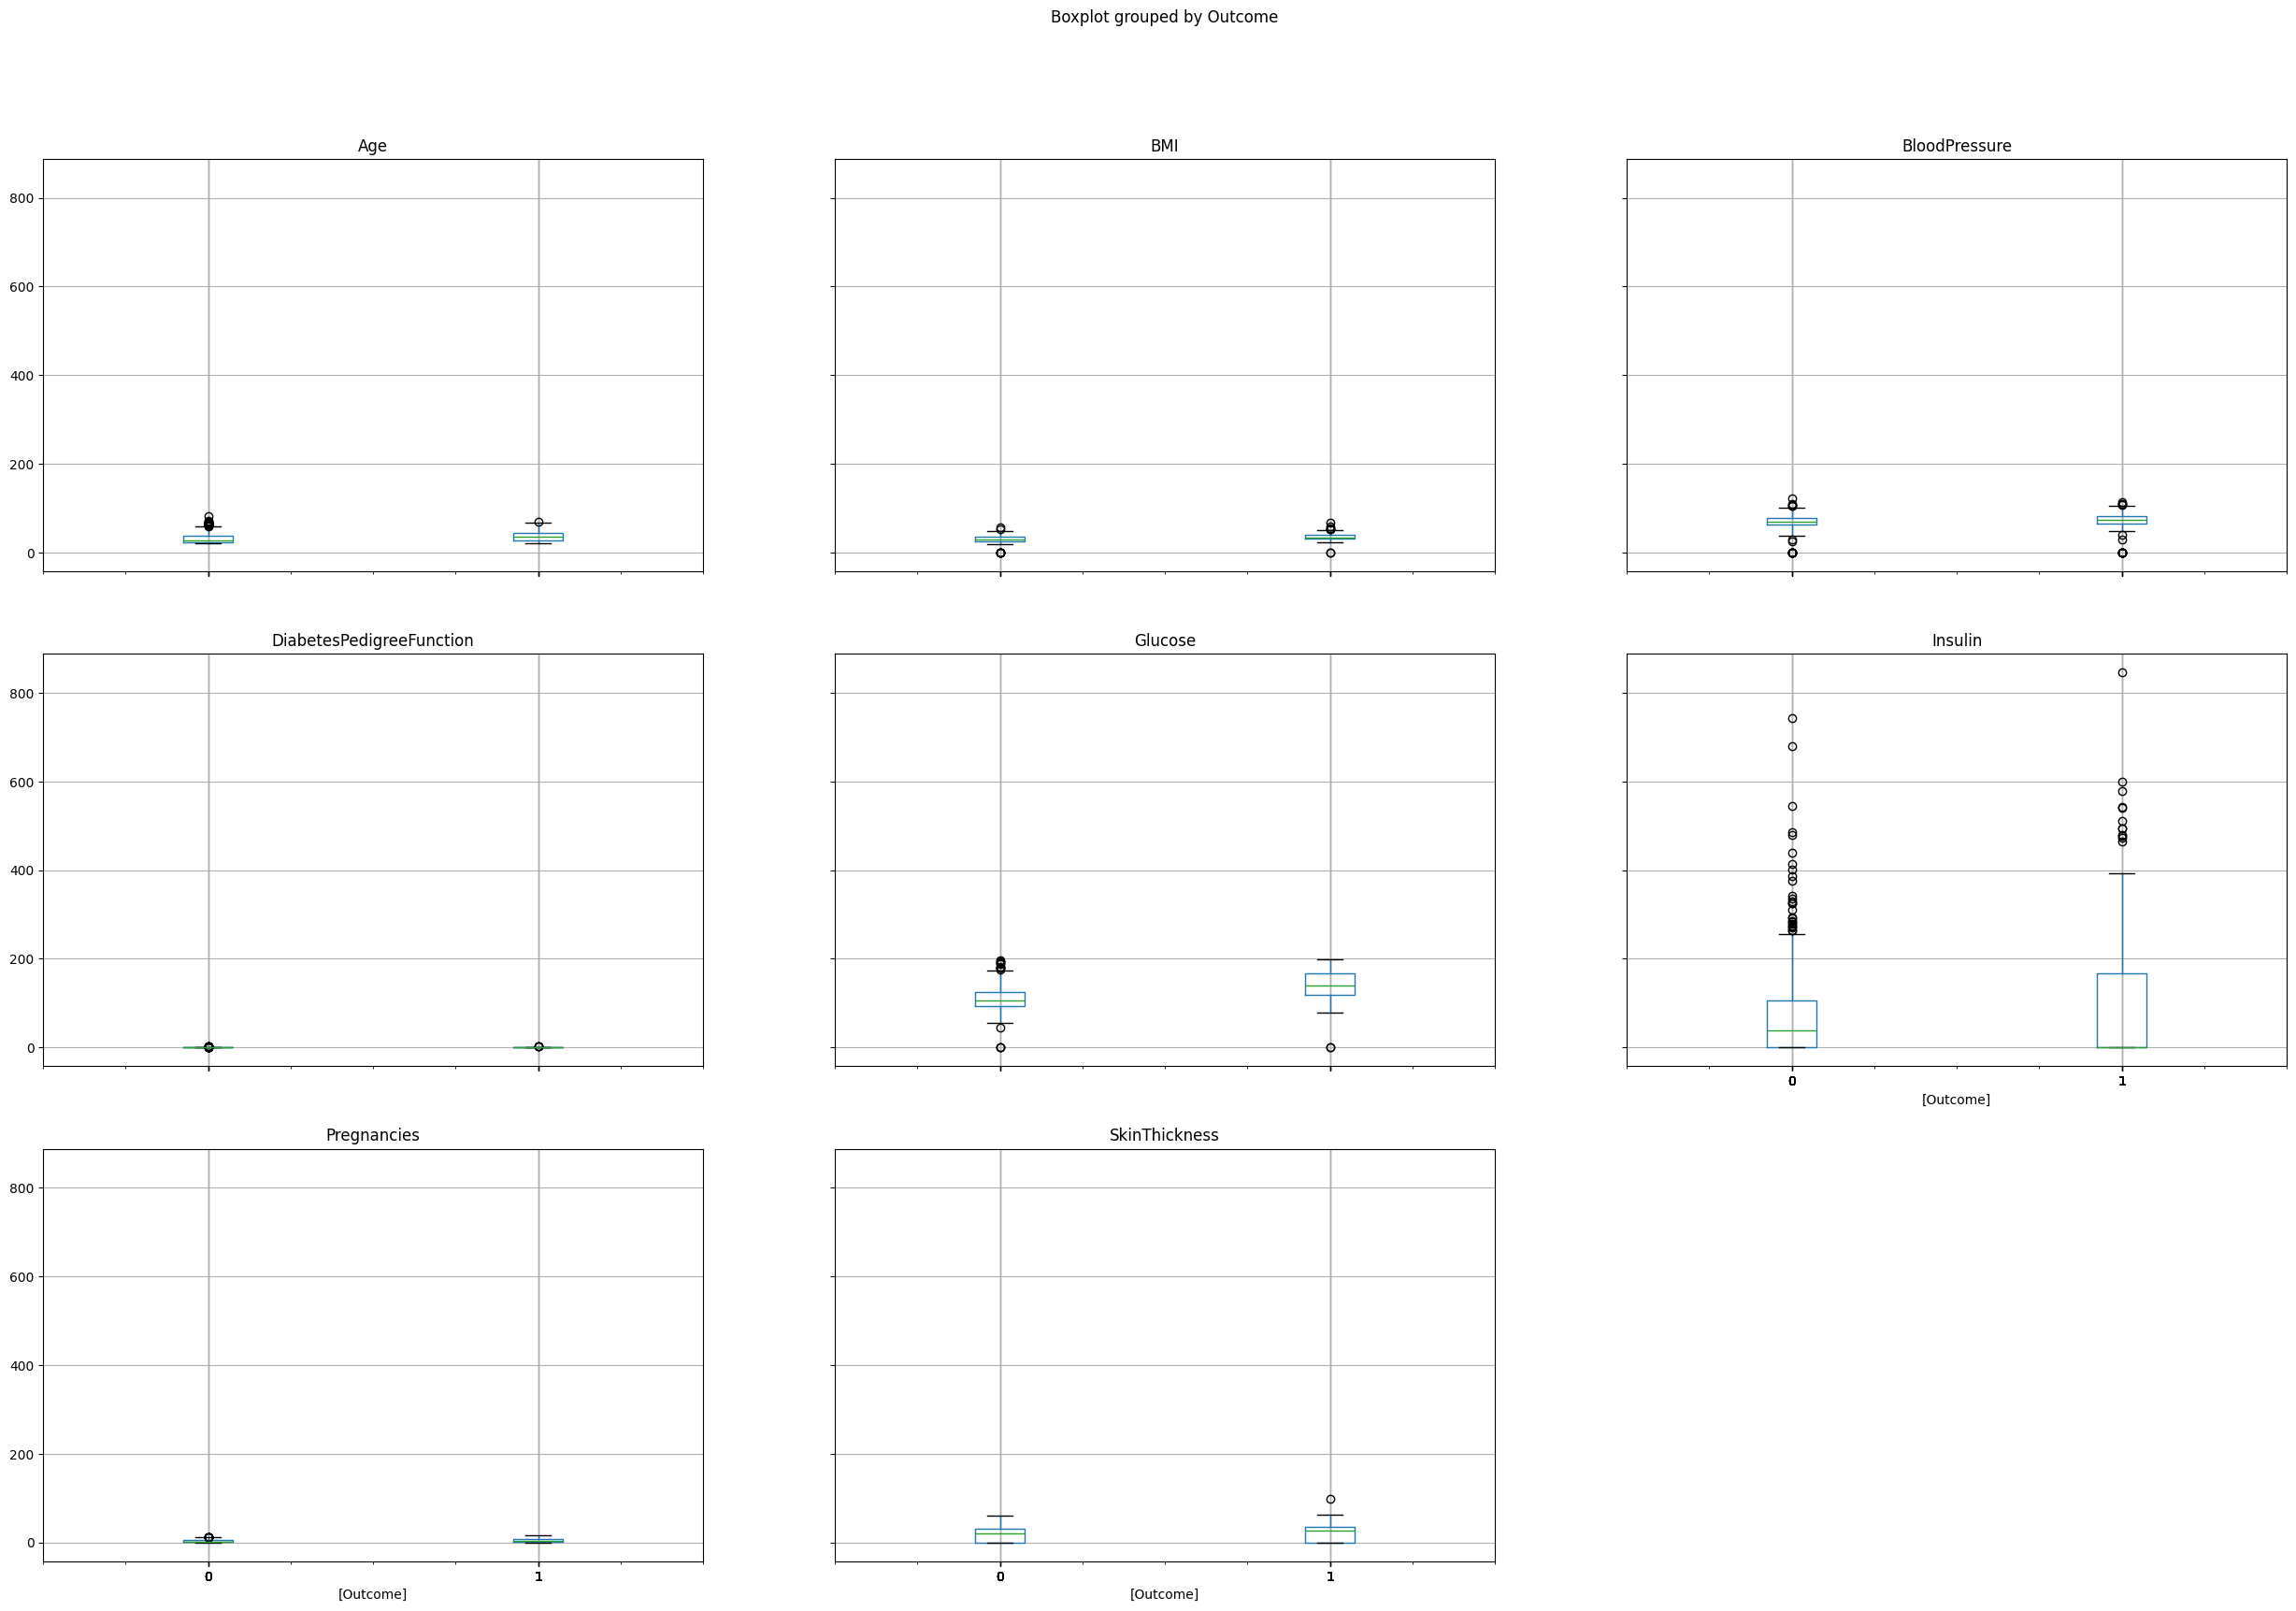

In [12]:
plt.figure()
dataset.boxplot(by="Outcome", figsize=(30, 20))
plt.show()

## 2) Data preprocessing

#### Xác định  ``features`` và ``labels``

In [15]:
feature_columns = list(dataset)[0:-1] # Excluding Outcome column
X = dataset[feature_columns].values
y = dataset['Outcome'].values


#### Encoding (Lable Encoding)

Outcome là 0 và 1, khỏi encode

0 là ko bịnh
1 là bị bịnh

####  Spliting dataset into training set and test set

- training set: dùng để xây dựng classifier
- test set: sẽ được sử dụng để evaluate liệu  classifier  tốt hay không

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
X_train.shape #614 rows dùng để train(80%)

(614, 8)

In [19]:
y_train.shape

(614,)

In [21]:
X_test.shape #154 rows dùng để test (20%)

(154, 8)

In [22]:
y_test.shape

(154,)

## 3) Using KNN for classification

####  Xây dựng model

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score



#### Thay đổi ``k`` để tìm ``k`` phù hợp

In [24]:

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

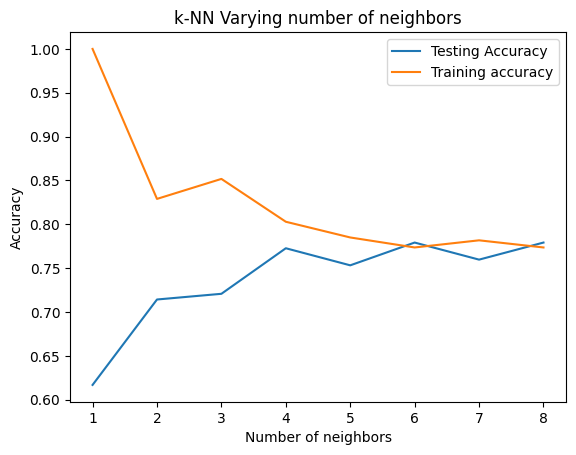

In [25]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

#### Từ biểu đồ trên, ta chọn ``k = 6`` để xây dựng model

In [27]:
# Tạo model (k = 1)
classifier = KNeighborsClassifier(n_neighbors=6)

# Fitting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

####  Prediction

In [28]:
# Predicting on the test set
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

####  Evaluating the model for the test set
- Tương tự cho training set

Xây dựng confusion matrix:

In [29]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[94, 13],
       [21, 26]])

##### Accuracy:

Cách 1:

In [30]:
#Sử dụng hàm accuracy_score
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 77.92 %.


Cách 2:

In [33]:
# Tính accuracy bằng tay dựa trên confusion matrix
acccuracy_byhand = (94+26)/(94+26+13+21)
acccuracy_byhand

0.7792207792207793

Cách 3:

In [32]:
knn.score(X_test, y_test)

0.7792207792207793